In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import pandas as pd
import seaborn as sns

from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

In [2]:
#Read the csv file
austin_df = pd.read_csv('austin_311_service_requests.csv',low_memory=False)

#Create a df with the approriate columns that we need.
austin_df = austin_df[["city", "county", "incident_zip", 
                       "created_date", "owning_department",
                       "latitude", "longitude"]]

austin_df.head()

,city,county,incident_zip,created_date,owning_department,latitude,longitude
0,AUSTIN,TRAVIS,78741.0,2015-01-20 10:41:48,Animal Services Office,30.224549,-97.690675
1,AUSTIN,TRAVIS,78757.0,2016-05-22 10:00:49,Animal Services Office,30.350881,-97.747492
2,AUSTIN,TRAVIS,78744.0,2014-01-06 18:04:00,Animal Services Office,30.199263,-97.711366
3,AUSTIN,TRAVIS,78727.0,2014-11-15 15:43:41,Austin Code Department,30.425112,-97.707188
4,AUSTIN,TRAVIS,78723.0,2014-07-28 17:33:00,Animal Services Office,30.311821,-97.669302


In [3]:
austin_df.columns

Index(['city', 'county', 'incident_zip', 'created_date', 'owning_department',
       'latitude', 'longitude'],
      dtype='object')

In [4]:
#Clean up the columns and put them in order.
austin_df = austin_df.rename(columns={"city":"City", "county":"County","incident_zip":"Zip Code",
                                      "created_date":"Date", "owning_department":"Department",
                                      "latitude":"Lat", "longitude": "Lon"})
austin_df.head(10)

,City,County,Zip Code,Date,Department,Lat,Lon
0,AUSTIN,TRAVIS,78741.0,2015-01-20 10:41:48,Animal Services Office,30.224549,-97.690675
1,AUSTIN,TRAVIS,78757.0,2016-05-22 10:00:49,Animal Services Office,30.350881,-97.747492
2,AUSTIN,TRAVIS,78744.0,2014-01-06 18:04:00,Animal Services Office,30.199263,-97.711366
3,AUSTIN,TRAVIS,78727.0,2014-11-15 15:43:41,Austin Code Department,30.425112,-97.707188
4,AUSTIN,TRAVIS,78723.0,2014-07-28 17:33:00,Animal Services Office,30.311821,-97.669302
5,AUSTIN,TRAVIS,78702.0,2016-06-20 16:44:00,Animal Services Office,30.272079,-97.708163
6,AUSTIN,TRAVIS,78744.0,2015-08-25 11:03:04,Austin Code Department,30.178479,-97.763169
7,AUSTIN,TRAVIS,78749.0,2014-08-26 13:01:00,Austin Water Utility,30.218928,-97.855545
8,AUSTIN,TRAVIS,78702.0,2015-06-19 16:31:06,Parks & Recreation Department,30.269661,-97.730193
9,AUSTIN,TRAVIS,78759.0,2017-08-01 12:55:03,Austin Code Department,30.429089,-97.765658


In [5]:
#Replace the empty rows with 'NaN'.
austin_df.replace('', np.nan, inplace=True)
austin_df.head()

,City,County,Zip Code,Date,Department,Lat,Lon
0,AUSTIN,TRAVIS,78741.0,2015-01-20 10:41:48,Animal Services Office,30.224549,-97.690675
1,AUSTIN,TRAVIS,78757.0,2016-05-22 10:00:49,Animal Services Office,30.350881,-97.747492
2,AUSTIN,TRAVIS,78744.0,2014-01-06 18:04:00,Animal Services Office,30.199263,-97.711366
3,AUSTIN,TRAVIS,78727.0,2014-11-15 15:43:41,Austin Code Department,30.425112,-97.707188
4,AUSTIN,TRAVIS,78723.0,2014-07-28 17:33:00,Animal Services Office,30.311821,-97.669302


In [6]:
# Check for any empty data
austin_df.count()

City          454982
County        452747
Zip Code      454963
Date          452741
Department    459305
Lat           455541
Lon           455541
dtype: int64

In [7]:
#Drop rows with 'NaN'.
cleanaustin_df = austin_df.dropna(how="any")
cleanaustin_df.count()

City          445814
County        445814
Zip Code      445814
Date          445814
Department    445814
Lat           445814
Lon           445814
dtype: int64

In [8]:
cleanaustin_df.head(15)

,City,County,Zip Code,Date,Department,Lat,Lon
0,AUSTIN,TRAVIS,78741.0,2015-01-20 10:41:48,Animal Services Office,30.224549,-97.690675
1,AUSTIN,TRAVIS,78757.0,2016-05-22 10:00:49,Animal Services Office,30.350881,-97.747492
2,AUSTIN,TRAVIS,78744.0,2014-01-06 18:04:00,Animal Services Office,30.199263,-97.711366
3,AUSTIN,TRAVIS,78727.0,2014-11-15 15:43:41,Austin Code Department,30.425112,-97.707188
4,AUSTIN,TRAVIS,78723.0,2014-07-28 17:33:00,Animal Services Office,30.311821,-97.669302
5,AUSTIN,TRAVIS,78702.0,2016-06-20 16:44:00,Animal Services Office,30.272079,-97.708163
6,AUSTIN,TRAVIS,78744.0,2015-08-25 11:03:04,Austin Code Department,30.178479,-97.763169
7,AUSTIN,TRAVIS,78749.0,2014-08-26 13:01:00,Austin Water Utility,30.218928,-97.855545
8,AUSTIN,TRAVIS,78702.0,2015-06-19 16:31:06,Parks & Recreation Department,30.269661,-97.730193
9,AUSTIN,TRAVIS,78759.0,2017-08-01 12:55:03,Austin Code Department,30.429089,-97.765658


In [9]:
#Get rid of cities that aren't in Austin.
value_list = ['AUSTIN', 'Austin', 'austin']
austincity_df = cleanaustin_df[cleanaustin_df.City.isin(value_list)]

#Get 'Austin' that aren't in Travis county.
value_list = ['TRAVIS']
austin311_df = austincity_df[austincity_df.County.isin(value_list)]

In [10]:
# Check data again
austin311_df.count()

City          422827
County        422827
Zip Code      422827
Date          422827
Department    422827
Lat           422827
Lon           422827
dtype: int64

In [11]:
# Change the zip to an integer
austin311_df["Zip Code"] = austin311_df["Zip Code"].astype(int)

#Drop the City and County
austin311_df.drop('City',axis=1, inplace=True)
austin311_df.drop('County',axis=1, inplace=True)
austin311_df.drop("Date", axis=1, inplace=True)

/Users/tom/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/tom/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/tom/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/tom/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:

In [12]:
austin311_df.head()

,Zip Code,Department,Lat,Lon
0,78741,Animal Services Office,30.224549,-97.690675
1,78757,Animal Services Office,30.350881,-97.747492
2,78744,Animal Services Office,30.199263,-97.711366
3,78727,Austin Code Department,30.425112,-97.707188
4,78723,Animal Services Office,30.311821,-97.669302


In [13]:
#Save the file
#austin311_df.to_csv('austin311_zip(lat_lon).csv', encoding='utf-8', index=False)

In [14]:
#Check to see the lat and lon are numbers and not strings
austin311_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422827 entries, 0 to 463539
Data columns (total 4 columns):
Zip Code      422827 non-null int64
Department    422827 non-null object
Lat           422827 non-null float64
Lon           422827 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 16.1+ MB


In [15]:
#Groupby the Zip Code and reanme Department as Number of Complaints
austin311_zip = austin311_df.groupby("Zip Code").agg({"Department": 'count', "Lat": 'mean', "Lon": 'mean'})
austin311_zip = austin311_zip.rename(columns={"Department":"Number of Complaints"})
austin311_zip.head()

,Number of Complaints,Lat,Lon
Zip Code,,,
78610,31,30.104558,-97.776716
78613,10,30.459545,-97.829108
78617,3276,30.178763,-97.633562
78620,1,30.284697,-98.067527
78621,1,30.382937,-97.392721


In [16]:
austin311_zip.reset_index()

,Zip Code,Number of Complaints,Lat,Lon
0,78610,31,30.104558,-97.776716
1,78613,10,30.459545,-97.829108
2,78617,3276,30.178763,-97.633562
3,78620,1,30.284697,-98.067527
4,78621,1,30.382937,-97.392721
5,78641,28,30.431032,-97.890981
6,78645,1,30.494930,-97.919706
7,78652,346,30.136881,-97.827456
8,78653,555,30.358910,-97.603566
9,78660,1695,30.424225,-97.649095


In [17]:
#Check to see if the total Number of Complaints of complaints are the same as above in 'austin311_df'.
total = austin311_zip['Number of Complaints'].sum()
print(total)

422827


In [18]:
austin311_zip["Coordinates"] = austin311_zip[['Lat', 'Lon']].apply(tuple, axis=1)
austin311_zip

,Number of Complaints,Lat,Lon,Coordinates
Zip Code,,,,
78610,31,30.104558,-97.776716,"(30.1045575026, -97.7767162003)"
78613,10,30.459545,-97.829108,"(30.459545485, -97.829108118)"
78617,3276,30.178763,-97.633562,"(30.1787626893, -97.6335617213)"
78620,1,30.284697,-98.067527,"(30.28469734, -98.06752687)"
78621,1,30.382937,-97.392721,"(30.38293725, -97.39272105)"
78641,28,30.431032,-97.890981,"(30.4310316071, -97.8909814589)"
78645,1,30.494930,-97.919706,"(30.49493033, -97.91970581)"
78652,346,30.136881,-97.827456,"(30.1368812182, -97.8274562409)"
78653,555,30.358910,-97.603566,"(30.3589102115, -97.6035659988)"


/Users/tom/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/tom/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


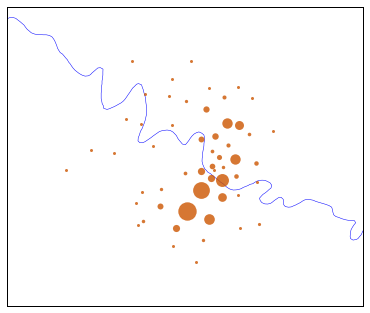

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

map = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=30.3, lon_0=-97.8,
            llcrnrlon=-98.2, llcrnrlat=30.02, urcrnrlon=-97.4, urcrnrlat=30.6) 

map.drawmapboundary(fill_color="#FFFFFF")
map.drawrivers(color="#0000FF")
    
def plot_area(Coordinates):
    count = austin311_zip.loc[austin311_zip.Coordinates == Coordinates]["Number of Complaints"]
    x, y = map(Coordinates[1], Coordinates[0])
    size = (count/8000) ** 2 + 3
    map.plot(x, y, 'o', markersize=size, color='#CC5500', alpha=0.8)
    
austin311_zip.Coordinates.apply(plot_area)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('311_call_density', dpi=200)